In [2]:
import pandas as pd 
import numpy as np 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import os

%matplotlib inline

print(os.listdir("../data"))

['digit-recognizer.zip', 'sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
X_train = pd.read_csv("../data/train.csv")
y_train = X_train.label
X_train = X_train.drop("label", axis=1)

In [6]:
X_train /= X_train.max().max()

In [7]:
X_train.shape

(42000, 784)

In [8]:
X_train.values.reshape(-1,28,28,1).shape

(42000, 28, 28, 1)

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)

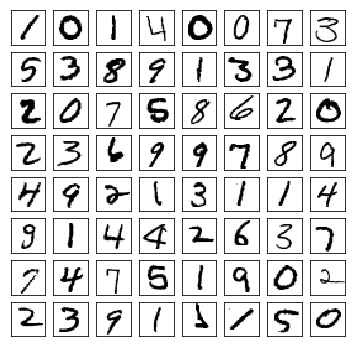

In [10]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i, :, :, 0], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [11]:
test_idx = np.random.choice(range(X_train.shape[0]), int(X_train.shape[0] * 0.1), replace=False)
train_idx = [i for i in range(X_train.shape[0]) if i not in test_idx]
X_test = X_train[test_idx]
y_test = pd.get_dummies(y_train[test_idx])
X_train = X_train[train_idx]
y_train = pd.get_dummies(y_train[train_idx])
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0
12,0,1,0,0,0,0,0,0,0,0


In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [13]:
model.fit(X_train, y_train, batch_size=320, epochs=1000, verbose=1,
          validation_split=0.1,
          callbacks=[EarlyStopping(monitor='val_acc', patience=3,
                                   verbose=1, mode='auto', restore_best_weights=True)])

Instructions for updating:
Use tf.cast instead.
Train on 34020 samples, validate on 3780 samples
Epoch 1/1000
34020/34020 [==============================] - 31s 925us/step - loss: 0.8677 - acc: 0.7102 - val_loss: 0.2074 - val_acc: 0.9373
Epoch 2/1000
34020/34020 [==============================] - 30s 875us/step - loss: 0.1932 - acc: 0.9474 - val_loss: 0.0895 - val_acc: 0.9728
Epoch 3/1000
34020/34020 [==============================] - 30s 878us/step - loss: 0.1201 - acc: 0.9686 - val_loss: 0.0856 - val_acc: 0.9767
Epoch 4/1000
34020/34020 [==============================] - 30s 886us/step - loss: 0.0931 - acc: 0.9750 - val_loss: 0.0639 - val_acc: 0.9799
Epoch 5/1000
34020/34020 [==============================] - 31s 903us/step - loss: 0.0737 - acc: 0.9812 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 6/1000
34020/34020 [==============================] - 30s 888us/step - loss: 0.0653 - acc: 0.9831 - val_loss: 0.0500 - val_acc: 0.9847
Epoch 7/1000
34020/34020 [==============================]

In [14]:
model.predict(X_test)

array([[2.82486230e-08, 8.25378450e-08, 9.17425691e-09, ...,
        2.85986662e-05, 1.03775055e-05, 9.99916196e-01],
       [4.77252725e-05, 6.76714990e-05, 3.10407122e-05, ...,
        1.09610322e-03, 8.93381075e-04, 9.84532058e-01],
       [3.62447821e-07, 2.10831459e-07, 1.73526814e-07, ...,
        3.18496006e-07, 1.22437787e-05, 2.44128823e-05],
       ...,
       [1.56220480e-07, 5.35976152e-09, 1.73707870e-09, ...,
        3.80263931e-10, 2.61844435e-09, 1.45055259e-10],
       [7.00670284e-07, 6.13839646e-08, 1.59752886e-08, ...,
        2.95273095e-09, 2.29558914e-08, 1.22467092e-09],
       [2.30383785e-06, 1.19015085e-05, 8.05664331e-06, ...,
        1.27705187e-06, 9.99892116e-01, 4.52011955e-05]], dtype=float32)

In [15]:
preds = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test.idxmax(axis=1), preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,389,0,0,0,0,0,0,0,0,2
1,0,474,0,0,0,0,1,2,0,0
2,0,1,447,1,1,0,0,3,0,0
3,1,0,1,413,0,0,1,0,2,0
4,0,0,2,0,379,0,0,1,1,4
5,0,0,0,0,0,351,3,0,1,0
6,1,0,0,0,0,0,435,0,2,0
7,0,0,1,0,0,0,0,459,0,0
8,0,0,3,0,0,1,0,0,418,3


In [17]:
(y_test.idxmax(axis=1) == preds).sum() / len(y_test)

0.9892857142857143

In [18]:
from keras.callbacks import EarlyStopping
test_probs = []
for i in range(10):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (4, 4), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=320, epochs=1000, verbose=1,
              validation_split=0.1,
              callbacks=[EarlyStopping(monitor='val_acc', patience=3,
                                       verbose=1, mode='auto', restore_best_weights=True)])
    
    test_probs.append(model.predict(X_test))

Train on 34020 samples, validate on 3780 samples
Epoch 1/1000
34020/34020 [==============================] - 31s 919us/step - loss: 0.8047 - acc: 0.7336 - val_loss: 0.1419 - val_acc: 0.9579
Epoch 2/1000
34020/34020 [==============================] - 30s 892us/step - loss: 0.1923 - acc: 0.9484 - val_loss: 0.1091 - val_acc: 0.9698
Epoch 3/1000
34020/34020 [==============================] - 31s 902us/step - loss: 0.1206 - acc: 0.9690 - val_loss: 0.0817 - val_acc: 0.9778
Epoch 4/1000
34020/34020 [==============================] - 31s 901us/step - loss: 0.0945 - acc: 0.9762 - val_loss: 0.0669 - val_acc: 0.9810
Epoch 5/1000
34020/34020 [==============================] - 31s 915us/step - loss: 0.0786 - acc: 0.9799 - val_loss: 0.1131 - val_acc: 0.9672
Epoch 6/1000
34020/34020 [==============================] - 31s 923us/step - loss: 0.0669 - acc: 0.9828 - val_loss: 0.0459 - val_acc: 0.9857
Epoch 7/1000
34020/34020 [==============================] - 32s 932us/step - loss: 0.0570 - acc: 0.9855 -

Epoch 12/1000
34020/34020 [==============================] - 33s 981us/step - loss: 0.0402 - acc: 0.9897 - val_loss: 0.0295 - val_acc: 0.9910
Epoch 13/1000
34020/34020 [==============================] - 34s 995us/step - loss: 0.0347 - acc: 0.9916 - val_loss: 0.0365 - val_acc: 0.9907
Epoch 14/1000
34020/34020 [==============================] - 34s 995us/step - loss: 0.0316 - acc: 0.9929 - val_loss: 0.0356 - val_acc: 0.9923
Epoch 15/1000
34020/34020 [==============================] - 34s 1ms/step - loss: 0.0323 - acc: 0.9917 - val_loss: 0.0474 - val_acc: 0.9902
Epoch 16/1000
34020/34020 [==============================] - 34s 1ms/step - loss: 0.0301 - acc: 0.9926 - val_loss: 0.0324 - val_acc: 0.9918
Epoch 17/1000
34020/34020 [==============================] - 36s 1ms/step - loss: 0.0276 - acc: 0.9924 - val_loss: 0.0334 - val_acc: 0.9923
Restoring model weights from the end of the best epoch
Epoch 00017: early stopping
Train on 34020 samples, validate on 3780 samples
Epoch 1/1000
34020/340

34020/34020 [==============================] - 33s 973us/step - loss: 0.0385 - acc: 0.9902 - val_loss: 0.0371 - val_acc: 0.9907
Epoch 13/1000
34020/34020 [==============================] - 33s 970us/step - loss: 0.0368 - acc: 0.9910 - val_loss: 0.0337 - val_acc: 0.9923
Epoch 14/1000
34020/34020 [==============================] - 33s 969us/step - loss: 0.0332 - acc: 0.9912 - val_loss: 0.0434 - val_acc: 0.9894
Restoring model weights from the end of the best epoch
Epoch 00014: early stopping
Train on 34020 samples, validate on 3780 samples
Epoch 1/1000
34020/34020 [==============================] - 34s 1ms/step - loss: 0.7888 - acc: 0.7438 - val_loss: 0.2116 - val_acc: 0.9378
Epoch 2/1000
34020/34020 [==============================] - 33s 972us/step - loss: 0.1983 - acc: 0.9474 - val_loss: 0.1426 - val_acc: 0.9585
Epoch 3/1000
34020/34020 [==============================] - 33s 970us/step - loss: 0.1259 - acc: 0.9667 - val_loss: 0.0721 - val_acc: 0.9780
Epoch 4/1000
34020/34020 [=========

In [19]:
preds = np.sum(test_probs, axis=0).argmax(axis=1)
pd.crosstab(y_test.idxmax(axis=1), preds)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,390,0,1,0,0,0,0,0,0,0
1,0,474,0,0,0,0,1,2,0,0
2,0,0,451,0,1,0,0,1,0,0
3,0,0,0,415,0,0,0,0,3,0
4,0,0,2,0,383,0,0,0,2,0
5,0,0,0,0,0,352,3,0,0,0
6,2,1,0,1,0,1,433,0,0,0
7,0,1,1,0,0,0,0,458,0,0
8,0,0,1,0,0,1,0,0,422,1


In [20]:
(y_test.idxmax(axis=1) == preds).sum() / len(y_test)

0.991904761904762

In [21]:
y_test.head()

,0,1,2,3,4,5,6,7,8,9
40338,0,0,0,0,0,0,0,0,0,1
24095,0,0,0,0,0,0,0,0,0,1
32205,0,0,0,0,0,1,0,0,0,0
33701,0,1,0,0,0,0,0,0,0,0
13232,1,0,0,0,0,0,0,0,0,0


In [22]:
preds

array([9, 9, 5, ..., 6, 6, 8], dtype=int64)

In [23]:
preds.shape

(4200,)